# General QBR vs. Passer Rating Analytics

Goal of this notebook is to compare the QBR and Passer Rating metrics of quarterbacks.

In [1]:
# import graphing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

### Import Dataset

In [2]:
merged_df = pd.read_csv('correct_merge_qb_ratings_df.csv')

In [3]:
merged_df.shape

(5899, 52)

In [4]:
merged_df.columns

Index(['PASS', 'PENALTY', 'PLAYER', 'PTS ADDED', 'QB PLAYS', 'RAW QBR',
       'RESULT', 'RK', 'RUN', 'TOTAL EPA', 'TOTAL QBR', 'WEEK', 'Year', 'name',
       'Tm', 'X', 'Game_result', 'Home_score', 'Away_score', 'Opp', 'id',
       'Date', 'G.', 'Age', 'Result', 'GS', 'Cmp', 'Att', 'Cmp.', 'Yds', 'TD',
       'Int', 'Rate', 'Sk', 'Yds.1', 'Y.A', 'AY.A', 'Att.1', 'Yds.2', 'Y.A.1',
       'TD.1', 'TD.2', 'Pts', 'Fmb', 'FF', 'FR', 'Yds.3', 'TD.3', 'team_win',
       'start_win', 'game_count', 'start_count'],
      dtype='object')

NOTE: Total QBR is the raw QBR adjusted for the Strength of the Opponent.

In [5]:
merged_df.head()

,PASS,PENALTY,PLAYER,PTS ADDED,QB PLAYS,RAW QBR,RESULT,RK,RUN,TOTAL EPA,...,Pts,Fmb,FF,FR,Yds.3,TD.3,team_win,start_win,game_count,start_count
0,4.3,0.1,"Rex Grossman, CHI",5.5,31,92.4,W 26-0 @ GB in Wk 1,1.0,0.6,5.4,...,0,0,0,0,-4,0,1,1,8,7
1,8.6,-0.1,"Donovan McNabb, PHI",8.1,38,95.4,W 24-10 @ HOU in Wk 1,2.0,0.1,8.9,...,0,0,0,0,0,0,1,1,90,87
2,6.5,0.2,"Chad Pennington, NYJ",6.1,43,88.1,W 23-16 @ TEN in Wk 1,3.0,-0.3,7.5,...,0,0,0,0,0,0,1,1,41,38
3,8.4,-0.3,"Peyton Manning, IND",5.8,45,86.0,W 26-21 @ NYG in Wk 1,4.0,0.0,8.3,...,0,0,0,0,0,0,1,1,127,127
4,1.3,0.4,"Mike Vick, ATL",1.8,30,70.5,W 20-6 @ CAR in Wk 1,5.0,1.1,3.4,...,0,0,0,0,0,0,1,1,54,50


## General Analysis

### Data Pre-Processing

In [6]:
merged_df.Rate.describe()

count    5899.000000
mean       86.793016
std        27.297263
min         0.000000
25%        68.600000
50%        86.400000
75%       105.150000
max       158.300000
Name: Rate, dtype: float64

In [7]:
merged_df['TOTAL QBR'].describe()

count    5899.000000
mean       53.679522
std        26.127960
min         0.300000
25%        32.400000
50%        54.800000
75%        75.800000
max        99.800000
Name: TOTAL QBR, dtype: float64

##### Min-Max Scaling

Use min-max scaling to directly compare QBR and Passer Rating.

In [8]:
merged_df['scale_pass_rate'] = ((merged_df.Rate - merged_df.Rate.min()) / (merged_df.Rate.max() - merged_df.Rate.min()))
merged_df['scale_qbr'] = ((merged_df['TOTAL QBR'] - merged_df['TOTAL QBR'].min()) / (merged_df['TOTAL QBR'].max() - merged_df['TOTAL QBR'].min()))

### Analysis

##### Comparing QBR and Passer Rating Averages over Time

In [9]:
# Find averages grouped by year
gb = merged_df.groupby('Year')[['scale_qbr','scale_pass_rate']].mean()*100
gb

,scale_qbr,scale_pass_rate
Year,,
2006,52.433745,51.371156
2007,53.631556,53.166611
2008,53.772511,53.233796
2009,54.123751,53.265323
2010,54.126898,54.526934
2011,54.026328,54.305225
2012,52.140911,54.365520
2013,52.646886,54.539541
2014,54.167302,56.902799


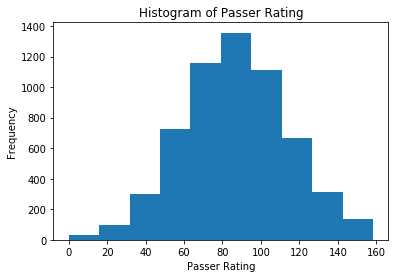

In [10]:
plt.hist(merged_df.Rate, bins=10)
plt.title('Histogram of Passer Rating')
plt.ylabel('Frequency')
plt.xlabel('Passer Rating')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0.5, 1.0, 'Average Scaled Total QBR Over Time')

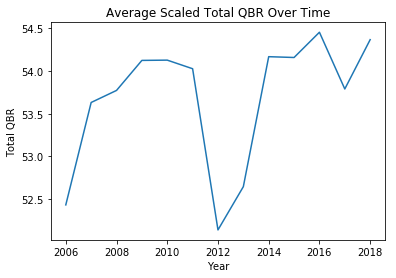

In [15]:
# QBR
plt.plot(gb.index, gb['scale_qbr'])
plt.xlabel('Year')
plt.ylabel('Total QBR')
plt.title('Average Scaled Total QBR Over Time')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0.5, 1.0, 'Average Scaled Passer Rating Over Time')

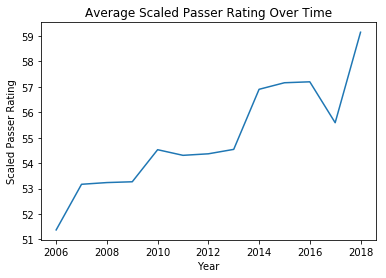

In [16]:
# Passer Rating
plt.plot(gb.index, gb.scale_pass_rate)
plt.xlabel('Year')
plt.ylabel('Scaled Passer Rating')
plt.title('Average Scaled Passer Rating Over Time')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0, 0.5, 'Scaled Rating')

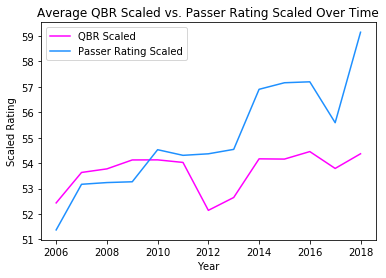

In [17]:
plt.plot(gb.index, gb['scale_qbr'], label = "QBR Scaled", color='magenta')
plt.plot(gb.index, gb['scale_pass_rate'], label = "Passer Rating Scaled", color='dodgerblue')
plt.legend()
plt.title('Average QBR Scaled vs. Passer Rating Scaled Over Time')
plt.xlabel('Year')
plt.ylabel('Scaled Rating')

##### QBR Average from 2006 to 2018

In [18]:
merged_df['TOTAL QBR'].mean()

53.679521952873365

In [19]:
merged_df['Rate'].mean()

86.79301576538397

In [20]:
np.percentile(merged_df['Rate'], 90)

122.3

This shows that Passer Rating inflates over time while QBR stays consistent.

### Compare Total QBR and Raw QBR

In [21]:
merged_df['QBR_diff'] = merged_df['TOTAL QBR'] - merged_df['RAW QBR']

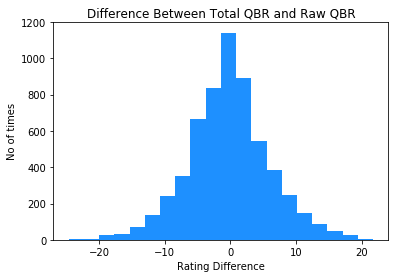

In [22]:
plt.hist(merged_df.QBR_diff, bins=20, color='dodgerblue')
plt.title('Difference Between Total QBR and Raw QBR')
plt.ylabel('No of times')
plt.xlabel('Rating Difference')
plt.show()

##### Average Stats over Years

In [23]:
nfl_stats_year_gb = merged_df.groupby('Year')[['scale_pass_rate','scale_qbr','Rate','TOTAL QBR',
                                               'RAW QBR','Cmp', 'Att', 'Yds', 'TD','Int']].mean()
nfl_stats_year_gb

,scale_pass_rate,scale_qbr,Rate,TOTAL QBR,RAW QBR,Cmp,Att,Yds,TD,Int
Year,,,,,,,,,,
2006,0.513712,0.524337,81.320539,52.471577,52.499585,18.734440,31.190871,213.875519,1.221992,1.010373
2007,0.531666,0.536316,84.162745,53.663399,55.329630,19.862745,32.204793,222.261438,1.374728,0.982571
2008,0.532338,0.537725,84.269099,53.803648,53.388197,19.508584,31.903433,220.993562,1.257511,0.890558
2009,0.532653,0.541238,84.319006,54.153132,54.194384,20.101512,32.747300,231.265659,1.386609,0.993521
2010,0.545269,0.541269,86.316136,54.156263,54.607219,20.125265,32.853503,233.256900,1.467091,0.944798
2011,0.543052,0.540263,85.965171,54.056197,54.081410,20.297009,33.589744,244.260684,1.467949,0.972222
2012,0.543655,0.521409,86.060619,52.180206,52.372990,20.826804,34.280412,242.344330,1.439175,0.909278
2013,0.545395,0.526469,86.336093,52.683652,52.882590,21.354565,34.796178,247.101911,1.539278,0.968153
2014,0.569028,0.541673,90.077131,54.196466,54.198753,21.609148,34.313929,247.507277,1.559252,0.850312


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0.5, 1.0, 'Average Pass Attempts per Game over Time')

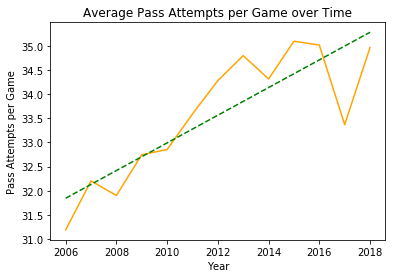

In [24]:
# Plot number of pass attempts per game over time
plt.plot(nfl_stats_year_gb.index, nfl_stats_year_gb.Att, color='orange')
z = np.polyfit(nfl_stats_year_gb.index, nfl_stats_year_gb.Att, 1)
p = np.poly1d(z)
plt.plot(nfl_stats_year_gb.index, p(nfl_stats_year_gb.index),"g--")
plt.xlabel('Year')
plt.ylabel('Pass Attempts per Game')
plt.title('Average Pass Attempts per Game over Time')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0.5, 1.0, 'Average Passer Rating per Game over Time')

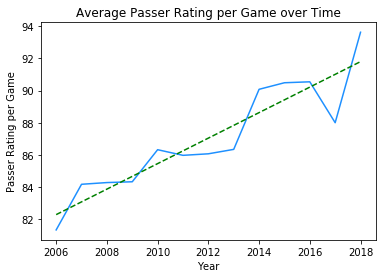

In [25]:
# Plot average passer rating per game over time
plt.plot(nfl_stats_year_gb.index, nfl_stats_year_gb.Rate, color='dodgerblue')
z = np.polyfit(nfl_stats_year_gb.index, nfl_stats_year_gb.Rate, 1)
p = np.poly1d(z)
plt.plot(nfl_stats_year_gb.index, p(nfl_stats_year_gb.index),"g--")
plt.xlabel('Year')
plt.ylabel('Passer Rating per Game')
plt.title('Average Passer Rating per Game over Time')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0.5, 1.0, 'Average QBR per Game over Time')

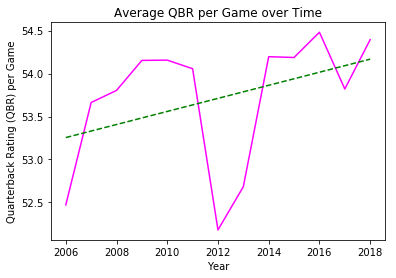

In [26]:
# Plot average QBR per game over time
plt.plot(nfl_stats_year_gb.index, nfl_stats_year_gb['TOTAL QBR'], color='magenta')
z = np.polyfit(nfl_stats_year_gb.index, nfl_stats_year_gb['TOTAL QBR'], 1)
p = np.poly1d(z)
plt.plot(nfl_stats_year_gb.index, p(nfl_stats_year_gb.index),"g--")
plt.xlabel('Year')
plt.ylabel('Quarterback Rating (QBR) per Game')
plt.title('Average QBR per Game over Time')

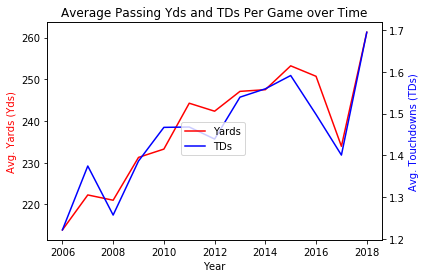

In [27]:
# Compare average passing yards and passing touchdowns per game over time
df = pd.DataFrame({"Year": nfl_stats_year_gb.index,
                   "Yards": nfl_stats_year_gb.Yds, 
                   "TDs": nfl_stats_year_gb.TD})

ax = df.plot(x="Year", y="Yards", legend=False, color='red')
ax.set_ylabel("Avg. Yards (Yds)",color="red",fontsize=10)
plt.title('Average Passing Yds and TDs Per Game over Time')
ax2 = ax.twinx()
df.plot(x="Year", y="TDs", ax=ax2, legend=False, color="blue")
ax2.set_ylabel("Avg. Touchdowns (TDs)",color="blue",fontsize=10)
ax.figure.legend(loc=10)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0, 0.5, 'Avg. Interceptions (Int)')

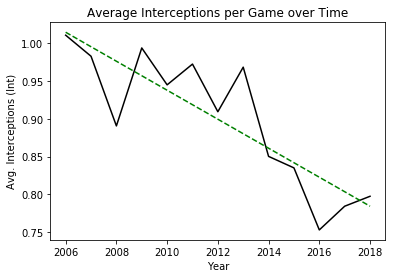

In [28]:
# Plot average interceptions per game over time
plt.plot(nfl_stats_year_gb.index, nfl_stats_year_gb.Int, color='Black')
z = np.polyfit(nfl_stats_year_gb.index, nfl_stats_year_gb.Int, 1)
p = np.poly1d(z)
plt.plot(nfl_stats_year_gb.index, p(nfl_stats_year_gb.index),"g--")
plt.title('Average Interceptions per Game over Time')
plt.xlabel('Year')
plt.ylabel('Avg. Interceptions (Int)')

## Individual Quarterback Analysis

##### Analyze Extremes

Below shows when Quarterbacks had high Raw QBR because they were playing bad teams.

##### Highest QBR Analysis

In [29]:
high_qbr = merged_df[merged_df['TOTAL QBR'] == 99.8][['PLAYER','TOTAL QBR','Rate','RESULT','Year',
                                           'Cmp','Att','Yds','TD.1','Int','Att.1', 'Yds.2', 'TD.2']]

high_qbr.columns = ['Player','Total QBR','Passer Rating','Game Results','Year','Cmp','Att','Yds','TD','Int','Rush Att',
                    'Rush Yds','Rush TD']
high_qbr

,Player,Total QBR,Passer Rating,Game Results,Year,Cmp,Att,Yds,TD,Int,Rush Att,Rush Yds,Rush TD
1570,"Carson Palmer, CIN",99.8,146.7,W 45-10 @ CHI in Wk 7,2009,20,24.0,233,0,0,0,0,0
3494,"Colin Kaepernick, SF",99.8,117.7,W 42-10 @ JAX in Wk 8,2013,10,16.0,164,2,0,7,54,2


Interesting that Palmer's Passer Rating is much higher compared to Kaepernick's.

In [30]:
##### Lowest QBR Analysis
low_qbr = merged_df[merged_df['TOTAL QBR'] == merged_df['TOTAL QBR'].min()][['PLAYER','TOTAL QBR','Rate','RESULT',
                                                                             'Year','Cmp','Att','Yds','TD.1','Int',
                                                                             'Att.1', 'Yds.2', 'TD.2']]

low_qbr.columns = ['Player','Total QBR','Passer Rating','Game Results','Year','Cmp','Att','Yds','TD','Int','Rush Att',
                    'Rush Yds','Rush TD']
low_qbr

,Player,Total QBR,Passer Rating,Game Results,Year,Cmp,Att,Yds,TD,Int,Rush Att,Rush Yds,Rush TD
4512,"Peyton Manning, DEN",0.3,0.0,L 29-13 @ KC in Wk 10,2015,5,20.0,35,0,4,0,0,0


##### Highest Passer Rating

In [31]:
high_pr = merged_df[merged_df['Rate'] == 158.3][['PLAYER','TOTAL QBR','Rate','RESULT','Year','Cmp','Att',
                                                 'Yds','TD.1','Int','Att.1', 'Yds.2', 'TD.2']]

high_pr.columns = ['Player','Total QBR','Passer Rating','Game Results','Year','Cmp','Att','Yds',
                   'TD','Int','Rush Att','Rush Yds','Rush TD']
high_pr

,Player,Total QBR,Passer Rating,Game Results,Year,Cmp,Att,Yds,TD,Int,Rush Att,Rush Yds,Rush TD
537,"Donovan McNabb, PHI",98.6,158.3,W 56-21 @ DET in Wk 3,2007,21,26.0,381,0,0,3,7,0
644,"Tom Brady, NE",99.7,158.3,W 49-28 @ MIA in Wk 7,2007,21,25.0,354,0,0,0,0,0
693,"Ben Roethlisberger, PIT",99.1,158.3,W 38-7 @ BAL in Wk 9,2007,13,16.0,209,0,0,0,0,0
968,"Kurt Warner, ARI",96.1,158.3,W 31-10 @ MIA in Wk 2,2008,19,24.0,361,0,0,0,0,0
1696,"Drew Brees, NO",99.1,158.3,W 38-17 @ NE in Wk 12,2009,18,23.0,371,0,0,1,-1,0
2164,"Tom Brady, NE",93.2,158.3,W 45-24 @ DET in Wk 12,2010,21,27.0,341,0,0,4,1,0
3087,"Robert Griffin III, WSH",91.9,158.3,W 31-6 @ PHI in Wk 11,2012,14,15.0,200,0,0,12,84,0
3517,"Nick Foles, PHI",98.4,158.3,W 49-20 @ OAK in Wk 9,2013,22,28.0,406,0,0,4,10,0
3683,"Alex Smith, KC",87.5,158.3,W 56-31 @ OAK in Wk 15,2013,17,20.0,287,0,0,4,17,0
4217,"Geno Smith, NYJ",89.2,158.3,W 37-24 @ MIA in Wk 17,2014,20,25.0,358,0,0,5,18,0


In [32]:
# Find average total Passing Yards over the QBs with perfect passer ratings
high_pr.Yds.mean()

324.85714285714283

In [34]:
# Find completion percentage
high_pr.Cmp.sum() / high_pr.Att.sum()

0.8193146417445483

In [36]:
high_pr.shape[0] # A perfect passer rating was achieved in 14 games in our dataset

14

In [38]:
# Average completion percentage is in the 98th percentile of quarterback completion percentages
np.percentile(merged_df['Cmp.'], 98)

81.63759999999998

Kirk Cousins is an anomaly. Very interesting. Might want to graph this.

In [39]:
low_pr = merged_df[merged_df['Rate'] == merged_df['Rate'].min()][['PLAYER','TOTAL QBR','Rate','RESULT','Year','Cmp',
                                                                  'Att','Yds','TD.1','Int','Att.1', 'Yds.2', 'TD.2']]

low_pr.columns = ['Player','Total QBR','Passer Rating','Game Results','Year','Cmp','Att','Yds',
              'TD','Int','Rush Att','Rush Yds','Rush TD']
low_pr

,Player,Total QBR,Passer Rating,Game Results,Year,Cmp,Att,Yds,TD,Int,Rush Att,Rush Yds,Rush TD
422,"Joey Harrington, MIA",5.4,0.0,L 21-0 @ BUF in Wk 15,2006,5,17.0,20,0,2,1,7,0
4512,"Peyton Manning, DEN",0.3,0.0,L 29-13 @ KC in Wk 10,2015,5,20.0,35,0,4,0,0,0
5679,"Nathan Peterman, BUF",0.7,0.0,L 47-3 @ BAL in Wk 1,2018,5,18.0,24,0,2,1,1,0


In [40]:
# Average passing yards of quarterbacks with the worst possible passer rating (0)
low_pr.Yds.mean()

26.333333333333332

In [41]:
# Find QBs with the largest differences between Raw QBR and Total QBR
merged_df[merged_df.QBR_diff <= -15][['PLAYER','Year','TOTAL QBR','RAW QBR','QBR_diff','Rate','team_win']].sort_values(by='QBR_diff')

,PLAYER,Year,TOTAL QBR,RAW QBR,QBR_diff,Rate,team_win
554,"Matt Hasselbeck, SEA",2007,55.0,79.6,-24.6,88.6,1
2305,"Tim Tebow, DEN",2010,37.6,60.1,-22.5,89.4,1
44,"Drew Bledsoe, DAL",2006,46.3,68.1,-21.8,87.3,1
4494,"Kirk Cousins, WSH",2015,56.0,77.1,-21.1,158.3,1
5341,"Deshaun Watson, HOU",2017,41.6,62.3,-20.7,103.4,1
...,...,...,...,...,...,...,...
4254,"Carson Palmer, ARI",2015,71.6,86.7,-15.1,122.8,1
1538,"Daunte Culpepper, DET",2009,42.6,57.7,-15.1,83.4,0
4355,"Tyrod Taylor, BUF",2015,18.7,33.8,-15.1,82.8,0
1513,"Jay Cutler, CHI",2009,42.0,57.0,-15.0,100.4,1


Kirk Cousins shows up again. Should definitely highlight this game.

Below shows when Quarterbacks had low Raw QBR because they were playing good teams.

In [42]:
merged_df[merged_df.QBR_diff >= 15][['PLAYER','Year','TOTAL QBR','RAW QBR','QBR_diff','Rate','team_win']].sort_values(by='QBR_diff', ascending=False)

,PLAYER,Year,TOTAL QBR,RAW QBR,QBR_diff,Rate,team_win
920,"Charlie Batch, PIT",2007,66.3,44.6,21.7,69.0,0
1397,"Tony Romo, DAL",2008,55.6,34.6,21.0,55.8,0
1266,"Kurt Warner, ARI",2008,76.1,57.3,18.8,65.7,0
1148,"Matt Ryan, ATL",2008,42.0,23.4,18.6,68.1,0
1146,"JaMarcus Russell, OAK",2008,46.2,27.7,18.5,66.2,0
...,...,...,...,...,...,...,...
1388,"David Garrard, JAX",2008,81.2,65.9,15.3,49.9,0
1446,"Byron Leftwich, TB",2009,70.1,54.9,15.2,73.4,0
4423,"Sam Bradford, PHI",2015,42.6,27.5,15.1,58.7,0
1131,"Eli Manning, NYG",2008,79.6,64.6,15.0,87.9,1


##### Find Quarterbacks with low average QBR_diff

In [43]:
merged_df.groupby('name')[['QBR_diff','TOTAL QBR','RAW QBR']].mean().sort_values(by='QBR_diff').head(10)

,QBR_diff,TOTAL QBR,RAW QBR
name,,,
Matt Barkley,-6.971429,30.814286,37.785714
Cleo Lemon,-5.030000,45.280000,50.310000
Nate Sudfeld,-5.000000,34.400000,39.400000
Drew Bledsoe,-4.960000,56.140000,61.100000
Sean Mannion,-4.900000,14.500000,19.400000
Chase Daniel,-4.550000,51.350000,55.900000
Chris Weinke,-3.766667,17.633333,21.400000
Matt Flynn,-3.711111,30.688889,34.400000
Byron Leftwich,-3.618182,43.318182,46.936364


These players have high Raw QBR and low Total QBR, indicating that they played against poor teams.

##### Find Quarterbacks with high average QBR_diff

In [44]:
merged_df.groupby('name')[['QBR_diff','TOTAL QBR','RAW QBR']].mean().sort_values(by='QBR_diff', ascending=False).head(10)

,QBR_diff,TOTAL QBR,RAW QBR
name,,,
Ken Dorsey,11.200000,28.233333,17.033333
Todd Bouman,8.700000,66.100000,57.400000
Connor Cook,5.200000,14.700000,9.500000
Connor Shaw,5.100000,25.100000,20.000000
Kelly Holcomb,4.300000,35.233333,30.933333
Johnny Manziel,4.214286,49.857143,45.642857
Keith Null,4.150000,19.900000,15.750000
Tom Savage,3.988889,45.077778,41.088889
Richard Bartel,3.900000,29.200000,25.300000


These players have low Raw QBR and high Total QBR, indicating that they played against better teams.

##### Quarterbacks with highest QBR over timespan

In [45]:
high_career_qbr = merged_df.groupby('name')[['TOTAL QBR','Rate']].mean().sort_values(by='TOTAL QBR', ascending=False).head(10)
high_career_qbr

,TOTAL QBR,Rate
name,,
Patrick Mahomes,81.660000,111.410000
Billy Volek,79.200000,82.100000
Peyton Manning,71.906818,99.485606
Tom Brady,70.960335,101.102235
Drew Brees,67.723077,101.486667
Todd Collins,67.300000,107.650000
Aaron Rodgers,66.534247,104.257534
Matt Ryan,66.296914,95.809877
Todd Bouman,66.100000,68.500000


In [49]:
# Find quarterbacks with the highest average Total QBR over their career
high_career_qbr_game_count = merged_df[merged_df.name.isin(high_career_qbr.index)].groupby('name')[['TD']].count()
high_career_qbr_merged = pd.concat([high_career_qbr, high_career_qbr_game_count], axis=1).sort_values(by='TOTAL QBR', ascending=False)
high_career_qbr_merged.columns = ['Total QBR','Passer Rating','Number of Games']
high_career_qbr_merged

,Total QBR,Passer Rating,Number of Games
Patrick Mahomes,81.660000,111.410000,10
Billy Volek,79.200000,82.100000,1
Peyton Manning,71.906818,99.485606,132
Tom Brady,70.960335,101.102235,179
Drew Brees,67.723077,101.486667,195
Todd Collins,67.300000,107.650000,4
Aaron Rodgers,66.534247,104.257534,146
Matt Ryan,66.296914,95.809877,162
Todd Bouman,66.100000,68.500000,1
Dak Prescott,65.907895,96.568421,38


In [51]:
# Find quarterbacks with the highest average Passer Rating over their career
high_career_qbr_game_count = merged_df[merged_df.name.isin(high_career_qbr.index)].groupby('name')[['TD']].count()
high_career_qbr_merged = pd.concat([high_career_qbr, high_career_qbr_game_count], axis=1).sort_values(by='Rate', ascending=False)
high_career_qbr_merged.columns = ['Total QBR','Passer Rating','Number of Games']
high_career_qbr_merged

,Total QBR,Passer Rating,Number of Games
Patrick Mahomes,81.660000,111.410000,10
Todd Collins,67.300000,107.650000,4
Aaron Rodgers,66.534247,104.257534,146
Drew Brees,67.723077,101.486667,195
Tom Brady,70.960335,101.102235,179
Peyton Manning,71.906818,99.485606,132
Dak Prescott,65.907895,96.568421,38
Matt Ryan,66.296914,95.809877,162
Billy Volek,79.200000,82.100000,1
Todd Bouman,66.100000,68.500000,1


In [53]:
# Find quarterbacks with high career QBRs and Passer Ratings
list(set(high_career_pr.index) & set(high_career_qbr.index))

['Aaron Rodgers',
 'Patrick Mahomes',
 'Peyton Manning',
 'Tom Brady',
 'Drew Brees',
 'Todd Collins']

In [54]:
# Find QBs with low career average QBRs
low_career_qbr = merged_df.groupby('name')[['TOTAL QBR','Rate']].mean().sort_values(by='TOTAL QBR', ascending=True).head(10)

In [56]:
# Find QBs with low Total QBRs
low_career_qbr_game_count = merged_df[merged_df.name.isin(low_career_qbr.index)].groupby('name')[['TD']].count()
low_career_qbr_merged = pd.concat([low_career_qbr, low_career_qbr_game_count], axis=1).sort_values(by='TOTAL QBR', ascending=True)
low_career_qbr_merged.columns = ['Total QBR','Passer Rating','Number of Games']
low_career_qbr_merged

,Total QBR,Passer Rating,Number of Games
Matt Simms,2.10,38.90,1
Jamie Martin,2.20,90.30,1
Brock Berlin,3.00,60.60,1
Nathan Peterman,6.35,22.70,2
Greg McElroy,8.00,65.50,1
Jeff Tuel,10.55,41.70,2
Sean Mannion,14.50,71.80,1
Connor Cook,14.70,83.40,1
Brooks Bollinger,16.05,62.85,2
Max Hall,16.95,69.55,2


In [57]:
# Sort by Passer Rating rather than QBR
low_career_pr = merged_df.groupby('name')[['TOTAL QBR','Rate']].mean().sort_values(by='Rate', ascending=True).head(10)

In [58]:
low_career_pr_game_count = merged_df[merged_df.name.isin(low_career_pr.index)].groupby('name')[['TD']].count()
low_career_pr_merged = pd.concat([low_career_pr, low_career_pr_game_count], axis=1).sort_values(by='Rate', ascending=True)
low_career_pr_merged.columns = ['Total QBR','Passer Rating','Number of Games']
low_career_pr_merged

,Total QBR,Passer Rating,Number of Games
Nathan Peterman,6.350000,22.700000,2
Brian Brohm,17.950000,30.550000,2
Ken Dorsey,28.233333,35.033333,3
Matt Simms,2.100000,38.900000,1
Jeff Tuel,10.550000,41.700000,2
Keith Null,19.900000,44.350000,2
Caleb Hanie,23.150000,48.475000,4
Chris Simms,37.466667,48.500000,3
Andrew Walter,22.533333,49.366667,12
Ryan Lindley,18.612500,51.500000,8


In [59]:
# Find worst quarterbacks in QBR and Passer Rating
list(set(low_career_pr.index) & set(low_career_qbr.index))

['Matt Simms', 'Nathan Peterman', 'Jeff Tuel']

One could make the argument that these are the three worst NFL Quarterbacks statistically base on low QBR and Passer Rating metrics over their NFL careers.

### Blake Bortles and Kirk Cousins Analysis

In [60]:
merged_df['qbr_minus_pass_rate'] = (merged_df.scale_qbr - merged_df.scale_pass_rate)*100

In [61]:
blake_and_kirk = merged_df[(merged_df.name == 'Blake Bortles') | (merged_df.name == 'Kirk Cousins')]

##### Blake Bortles

In [62]:
# Subset Blake Bortles data
blake = merged_df[merged_df.name == 'Blake Bortles']

In [64]:
# Compare his statistics in Team wins and Team losses
blake.groupby('team_win')[['Rate','TOTAL QBR','RAW QBR','Cmp', 'Att', 'Cmp.', 'Yds', 'TD','Int','qbr_minus_pass_rate']].mean()

,Rate,TOTAL QBR,RAW QBR,Cmp,Att,Cmp.,Yds,TD,Int,qbr_minus_pass_rate
team_win,,,,,,,,,,
0,74.857778,41.142222,39.902222,22.533333,38.355556,58.503556,247.977778,1.333333,1.311111,-6.241092
1,95.034783,58.134783,60.400000,20.217391,33.347826,60.547391,244.956522,1.739130,0.521739,-1.909197


In [65]:
# Find average statistics over each Year
blake_stats_year_gb = blake.groupby('Year')[['Rate','TOTAL QBR','RAW QBR','Cmp', 'Att', 'Yds', 'TD','Int','team_win']].mean()

In [66]:
# Find number of games played by Blake
num_games_gb = blake.groupby('Year')[['Cmp']].count()
num_games_gb.columns = ['Num_Games']

In [67]:
# Find number of wins each year
num_wins_gb = blake.groupby('Year')[['team_win']].sum()
num_wins_gb.columns = ['Num_Wins']

In [68]:
# Analyze results
pd.concat([num_games_gb, num_wins_gb, blake_stats_year_gb], axis=1)

,Num_Games,Num_Wins,Rate,TOTAL QBR,RAW QBR,Cmp,Att,Yds,TD,Int,team_win
Year,,,,,,,,,,,
2014,14,3,69.078571,34.621429,34.157143,20.000000,33.928571,207.714286,0.785714,1.214286,0.214286
2015,16,5,89.312500,49.587500,50.162500,22.187500,37.875000,276.750000,2.187500,1.125000,0.312500
2016,16,3,78.300000,42.968750,42.993750,23.000000,39.062500,244.062500,1.437500,1.000000,0.187500
2017,15,9,88.426667,58.666667,58.613333,20.466667,33.933333,239.466667,1.400000,0.800000,0.600000
2018,7,3,82.728571,48.985714,48.128571,24.142857,39.714286,280.000000,1.428571,1.142857,0.428571


We can see that Blake's best year came in 2017, where he had 9 wins in 15 games and averaged his highest Total QBR during an NFL season. It is important to note that his Passer Rating was lower in 2017 compared to 2015. This is likely caused by Blake's team finding themselves losing early in games, causing them to pass the ball more. This inflated Blake's stats, therefore leading to a higher Passer Rating.

##### Kirk Cousins

In [69]:
kirk = merged_df[merged_df.name == 'Kirk Cousins']

In [70]:
kirk.groupby('team_win')[['Rate','TOTAL QBR','RAW QBR','Cmp', 'Att', 'Cmp.', 'Yds', 'TD','Int','qbr_minus_pass_rate']].mean()

,Rate,TOTAL QBR,RAW QBR,Cmp,Att,Cmp.,Yds,TD,Int,qbr_minus_pass_rate
team_win,,,,,,,,,,
0,85.068571,51.562857,51.177143,26.057143,40.342857,64.366000,289.971429,1.485714,1.257143,-2.218373
1,108.238710,65.461290,66.654839,22.193548,32.129032,69.434194,268.451613,1.903226,0.387097,-2.886951


In [71]:
kirk_stats_year_gb = kirk.groupby('Year')[['Rate','TOTAL QBR','RAW QBR','Cmp', 'Att', 'Yds', 'TD','Int','team_win']].mean()

num_games_gb = kirk.groupby('Year')[['Cmp']].count()
num_games_gb.columns = ['Num_Games']

num_wins_gb = kirk.groupby('Year')[['team_win']].sum()
num_wins_gb.columns = ['Num_Wins']

pd.concat([num_games_gb, num_wins_gb, kirk_stats_year_gb], axis=1)

,Num_Games,Num_Wins,Rate,TOTAL QBR,RAW QBR,Cmp,Att,Yds,TD,Int,team_win
Year,,,,,,,,,,,
2012,1,1,104.400000,79.200000,78.700000,26.000000,37.000000,329.000000,2.000000,1.000000,1.000000
2013,3,0,65.933333,40.900000,47.000000,23.000000,43.333333,249.000000,1.333333,1.666667,0.000000
2014,6,2,85.050000,48.033333,47.750000,21.000000,34.000000,285.000000,1.666667,1.500000,0.333333
2015,15,8,100.186667,61.320000,63.886667,24.466667,35.200000,266.000000,1.733333,0.733333,0.533333
2016,16,8,98.887500,63.675000,63.193750,25.375000,37.875000,307.312500,1.562500,0.750000,0.500000
2017,16,7,95.406250,56.093750,53.900000,21.687500,33.750000,255.812500,1.687500,0.812500,0.437500
2018,9,5,100.977778,56.422222,57.722222,28.777778,40.333333,298.333333,1.888889,0.555556,0.555556


In [72]:
# Comparing Blake Bortles and Kirk Cousins careers directly
b_k_gb = blake_and_kirk.groupby('name')[['TOTAL QBR','Rate','Cmp', 'Att', 'Cmp.', 'Yds', 'TD','Int','qbr_minus_pass_rate']].mean()
b_k_gb.columns = ['QBR','Passer Rating','Cmp','Att','Cmp %','Yds','TD','Int',
                  'Scaled QBR Minus Scaled Passer Rating']
b_k_gb

,QBR,Passer Rating,Cmp,Att,Cmp %,Yds,TD,Int,Scaled QBR Minus Scaled Passer Rating
name,,,,,,,,,
Blake Bortles,46.889706,81.682353,21.750000,36.661765,59.194853,246.955882,1.470588,1.044118,-4.775893
Kirk Cousins,58.090909,95.951515,24.242424,36.484848,66.746515,279.863636,1.681818,0.848485,-2.532402


Kirk Cousins seems to outperform Blake Bortles in every passing statistic shown in the table above.

In [73]:
# Find average difference between scaled Passer Rating and scaled QBR
merged_df.qbr_minus_pass_rate.mean() # scaled QBR, on average, 1.18 scaled points less than Passer Rating

-1.180423555019883

In [74]:
np.percentile(merged_df['qbr_minus_pass_rate'], 40)

-5.1568391547122765

Text(0.5, 1.0, 'Histogram of Scaled Difference Between QBR and Passer Rating per Game')

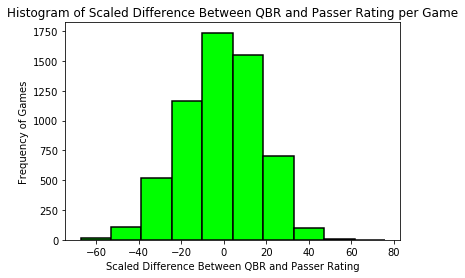

In [75]:
plt.hist(merged_df['qbr_minus_pass_rate'], color='lime', edgecolor='black', linewidth=1.5)
plt.xlabel('Scaled Difference Between QBR and Passer Rating')
plt.ylabel('Frequency of Games')
plt.title('Histogram of Scaled Difference Between QBR and Passer Rating per Game')

In [78]:
# Compare 3 QBs of interest
small_qb = merged_df[(merged_df.name.isin(['Blake Bortles','Kirk Cousins','Ryan Fitzpatrick']))]

In [79]:
small_qb_gb = small_qb.groupby('name')[['TOTAL QBR','Rate','Cmp', 'Att', 'Cmp.', 'Yds', 'TD','Int','qbr_minus_pass_rate']].mean()
small_qb_gb.columns = ['QBR','Passer Rating','Cmp','Att','Cmp %','Yds','TD','Int',
                  'Scaled QBR Minus Scaled Passer Rating']
small_qb_gb

,QBR,Passer Rating,Cmp,Att,Cmp %,Yds,TD,Int,Scaled QBR Minus Scaled Passer Rating
name,,,,,,,,,
Blake Bortles,46.889706,81.682353,21.750000,36.661765,59.194853,246.955882,1.470588,1.044118,-4.775893
Kirk Cousins,58.090909,95.951515,24.242424,36.484848,66.746515,279.863636,1.681818,0.848485,-2.532402
Ryan Fitzpatrick,50.522131,82.383607,19.754098,32.795082,60.137705,224.065574,1.483607,1.081967,-1.568204


Of these 3 QBs, Blake Bortles is the best example of a QB with a high Passer Rating but low QBR. This implies that he padded his stats. Although his stats led to a high Passer Rating, his low QBRs showed that he did not often have a positive impact on his team. This is shown with the large negative Scaled QBR Minus Scaled Passer Rating metric showed in the last column.